# CREDIT CARD FRAUD DETECTION

For Downloading Dataset (https://github.com/shubh2002/DataSets)

Fraud detection is one of the top priorities for banks and financial institutions, which can be addressed using machine learning. According to a report published by Nilson, in 2017 the worldwide losses in card fraud related cases reached 22.8 billion dollars. The problem is forecasted to get worse in the following years, by 2021, the card fraud bill is expected to be 32.96 billion dollars.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('credit_card_fraud.csv',names=range(30),header=0)

In [3]:
df.shape

(662, 30)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [5]:
df.shape

(662, 30)

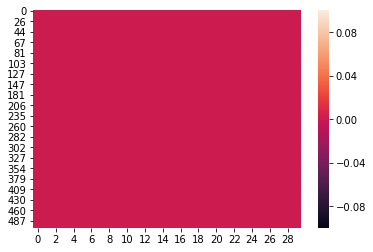

In [6]:
sns.heatmap(df.isnull())

In [7]:
df[29].value_counts()

0    636
1     26
Name: 29, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Amount']=sc.fit_transform(df[28].values.reshape(-1,1))

In [9]:
df=df.drop([28],axis=1)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,29,Amount
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.327141
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.494201
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.258109
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.001114
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.322393


In [11]:
x=df.iloc[:,df.columns!=29]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Amount
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.327141
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.494201
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.258109
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.001114
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.322393


In [12]:
y=df.iloc[:,df.columns == 29]
y.head()

,29
0,0
1,0
1,0
2,0
2,0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100)
model1=model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
acc1

0.9698492462311558

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model2=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
model2=model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
acc2

0.9547738693467337

In [16]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
model3=model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
acc3

0.9547738693467337

In [17]:
from xgboost import XGBClassifier
model4=XGBClassifier(learning_rate=0.1,n_estimators=100)
model4=model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
acc4

0.9698492462311558

In [18]:
models=pd.DataFrame({'MODELS':['RANDOM FOREST','GRADIENT BOOSTING','ADA BOOST','XGBOOST'],
                    'SCORE':[acc1,acc2,acc3,acc4]})
models.sort_values(by='SCORE',ascending=False)

,MODELS,SCORE
0,RANDOM FOREST,0.969849
3,XGBOOST,0.969849
1,GRADIENT BOOSTING,0.954774
2,ADA BOOST,0.954774


In [19]:
"""Serialization"""

import joblib
filename='Practice_project.sav'
joblib.dump(model1,filename)

['Practice_project.sav']